## Understanding Input Shaping
*Using a cart with a pendulum attached*

This notebook will first derive the equations of motion for a Cart with a pendulum attached. A diagram is provided below to illustrate the system. Kane's method will be used for 

In [1]:
from sympy import symbols, init_printing
import sympy
import sympy.physics.mechanics as me
from pydy.system import System
init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
from scipy.integrate import ode, odeint
import numpy as np
%matplotlib inline

N = me.ReferenceFrame('N')
B = me.ReferenceFrame('B')

x, theta, f, S = me.dynamicsymbols('x theta f S')
x_dot, theta_dot = me.dynamicsymbols('x_dot theta_dot')
L, M, m, t = sympy.symbols('L M m t')

B.orient(N, 'Axis', (theta, N.z))
B.set_ang_vel(N, theta_dot * N.z)

In [2]:
O1 = me.Point('O1')
G = me.Point('G')
P = me.Point('P')
O1.set_vel(N, 0)
G.set_pos(O1, x * N.x)
G.set_vel(N, x_dot * N.x)
P.set_pos(G, -L * B.y)
P.v2pt_theory(G,N,B)

x_dot(t) n_x + L⋅θ_dot(t) b_x

In [3]:
kde = [x_dot - x.diff(t), theta_dot - theta.diff(t)]

In [4]:
p_grav = (P, -m * 9.81 * N.y)
p_cart = (P, m * 9.81 * B.y)
cart_p = (G, -m * 9.81 * B.y)
force = (G, f * N.x)
shape_fo = (G, S * N.x)

pendulum = me.Particle('pendulum', P, m)
cart = me.Particle('cart', G, M)

In [5]:
coordinates = [x, theta]
speeds= [x_dot, theta_dot]
kane = me.KanesMethod(N, coordinates, speeds, kde)

# loads = [spring_1_force_P1, spring_2_force_P2, grav_force]
loads = [p_grav, p_cart, cart_p, force, shape_fo]

fr, frstar = kane.kanes_equations(loads, [cart, pendulum])

Mass = kane.mass_matrix_full
full = kane.forcing_full

In [6]:
# def bang(F_amp, StartTime1, EndTime1, t):
#     f = F_amp * (t >= StartTime1) * (t <= EndTime1)
#     return f

_function to issue bangs at different time periods_

In [7]:
def bang(Amps, Times, Interval, t):
    '''
    This function will issue impulses at the times given
    '''
    n = np.size(Amps)
    F = []
    for i in range(n):
        Fi = Amps[i]
        Ti = Times[i]
        fi = Fi * (t >= Ti) * (t <= Ti + Interval)
        F.append(fi)
    f = sum(F)
    return f

In [8]:
Pen_length = 1
nat_freq = np.sqrt(9.81 / Pen_length)

F_max1 = 20
F_max2 = -20
Start1 = 0
End1 = 1
Start2 = 2 * (np.pi) / nat_freq
# Start2 = 0.5
End2 = np.abs(Start1 - End1) + Start2

In [9]:
# Phasor_Plot([F_max1, F_max2],[Start1, Start2],1,np.sqrt(9.81 / Pen_length))
# Phasor_Plot([20, 20],[0, 0.5],0.5,np.sqrt(9.81 / Pen_length), True)

Need to explain that 1 degree is 0.010331s
$\frac{2}{193.608767798}=0.010331s$

* Next need to explain 1 pulse can be shaped to have zero vibration and stopped
* 2 pulses can be shaped to a velocity
* 3 pulses can be shaped to coast at constant velocity then stop
* The phasor diagram shows how the angle will vibrate

In [10]:
sys = System(kane)
sys.constants = {m:0.10,
                 M:10.0,
                 L:Pen_length
                 }
sys.initial_conditions = {x:0, theta:0, x_dot:0, theta_dot:0}

sys.specifieds={f:lambda x, t:bang([20,20,28.35], [0,0.5,1.253],0.5,t)}
# sys.specifieds={f:lambda x, t:20}

# sys.specifieds={f:lambda x, t:richard(t, 20, 1, 0.1, 2, 0, 20)}
sys.times = np.linspace(0.0, 40.0, 1000)

In [11]:
resp = sys.integrate()

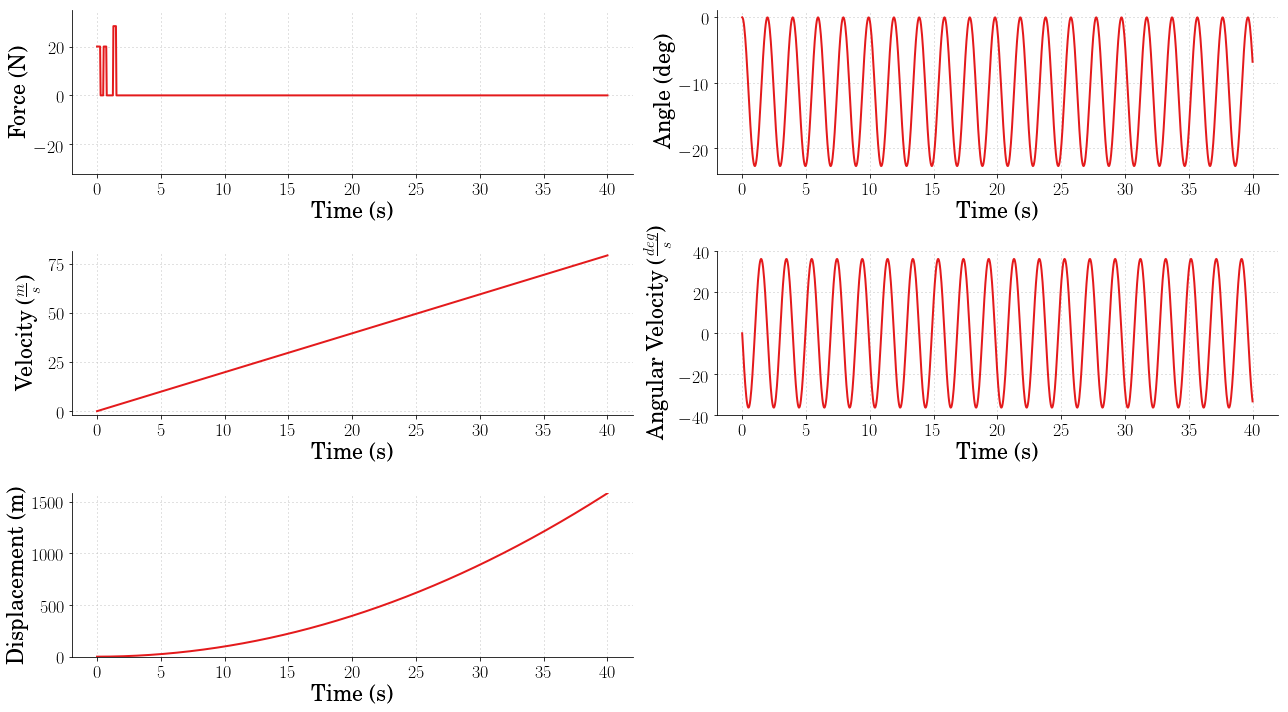

In [12]:
sim_time = np.linspace(0.0, 40.0, 1000)
fig = plt.figure(figsize=(18, 10))

# fig = plt.figure(0)
fig.add_subplot(321)
plt.plot(sim_time, bang([20,20,28.35], [0,0.5,1.253],0.25,sim_time))
# plt.plot(sim_time, richard(sim_time, 20, 5, 0.1, 2, 0, 10))
plt.xlabel(r'Time (s)')
plt.ylabel(r'Force (N)')
plt.ylim(-F_max1 - 12, F_max1 + 15)
# plt.xlim(0,5)
# plt.title(r'Force Exerted')

fig.add_subplot(323)
plt.plot(sim_time, resp[:,2], label='Unshaped')
plt.ylim(np.min(resp[:,2]-2),np.max(resp[:,2]+2))
plt.xlabel(r'Time (s)')
plt.ylabel(r'Velocity ($\frac{m}{s}$)')
# plt.title(r'X Motion')

fig.add_subplot(322)
plt.plot(sim_time, np.degrees(resp[:,1]), label='Unshaped')
plt.xlabel(r'Time (s)')
plt.ylabel(r'Angle (deg)')
# plt.title(r'$\theta$ Motion')

fig.add_subplot(324)
plt.plot(sim_time, np.degrees(resp[:,3]), label='Unshaped')
plt.xlabel(r'Time (s)')
plt.ylabel(r'Angular Velocity ($\frac{deg}{s}$)')
# plt.title(r'$\theta$ Motion')

fig.add_subplot(325)
plt.plot(sim_time, resp[:,0], label='Unshaped')
plt.ylim(0,np.max(resp[:,0]+2))
plt.xlabel(r'Time (s)')
plt.ylabel(r'Displacement (m)')
# plt.title(r'X Motion')

plt.tight_layout()
plt.show()

Processing frame 0
Processing frame 30
Processing frame 60
Processing frame 90
Processing frame 120
Processing frame 150
Processing frame 180
Processing frame 210
Processing frame 240
Processing frame 270


RuntimeError: dvipng was not able to process the following file:
/Users/forrest/.matplotlib/tex.cache/0aaebc8fadde98d0454b4268d09586c7.dvi
Here is the full report generated by dvipng: 



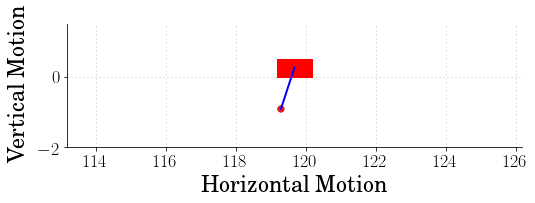

In [13]:
x_ani=resp[:,0]
pen_x = x_ani + Pen_length*np.sin(resp[:,1])
pen_y = Pen_length*np.cos(resp[:,1])
cart_width = 1
cart_height = 0.5
x_max_movie_index = np.where(sim_time>=10)[0][0]
x_max = max(x_ani[0:x_max_movie_index])

import matplotlib.animation as animation

# Change some plot properties to make the video work and look better
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import Circle
mpl.rcParams['savefig.dpi'] = 160
mpl.rcParams['savefig.bbox'] = 'standard'
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, aspect='equal')
plt.ylim(-Pen_length- 1, cart_height + 1)
# plt.xlim(-.2, np.max(x_ani) + cart_width+0.25)
# Uncomment to follow cart with camera
plt.xlim(x_ani[0]-6.0, x_ani[0]+cart_width+6.0)
plt.xlabel('Horizontal Motion', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Vertical Motion', fontsize=22, weight='bold', labelpad=10)


circle = plt.Circle((0, 0), 0.10, zorder = 0)
spring, = plt.plot([],[], linewidth=2, linestyle = '-', label='leftcable', 
                   color='b')
rect = patches.Rectangle((0, 0), 0, 0, angle=0, color='r')

def init():
    """ Initialize the lines in the plot """
    circle.center = (0, 0)
    spring.set_data([], [])
    ax.add_patch(circle)
    ax.add_patch(rect)
    return circle, spring, rect,

def animate_un(i):
    """ Update the plot for frame i """
    if not (i % 30): # print notice every 30th frame
        print('Processing frame {}'.format(i))

    circle.center=([pen_x[i]+ cart_width / 2, -pen_y[i]])
    spring.set_data([x_ani[i] + cart_width / 2, pen_x[i]+ cart_width / 2],
                    [cart_height / 2, -pen_y[i]])
    rect.set_width(cart_width)
    rect.set_height(cart_height)
    rect.set_xy([x_ani[i],0])
#     Uncomment to follow the cart with the camera
    plt.xlim(x_ani[i]-6.0, x_ani[i]+cart_width+6.0)
    return circle, spring, rect,

ani = animation.FuncAnimation(fig, animate_un, interval = 30, frames = 300,
                                 blit = True, init_func = init)

ani.save('/Users/forrest/Desktop/test.mp4', bitrate = 2500, fps = 30)

In [182]:
def richard(t, mag, steep, min_y, start, Y, fall=0):
    '''
    t     = current time
    mag   = max value
    steep = the steepness of the curve
    min_y = minimum start value of y axis
    start = when the function begins to rise
    Y     = y-intercept
    fall  = the time the function will fall back to the original value
    The function begins at Y and begins to change at the start value
    '''
    Q = (((mag/min_y)) - 1) / np.e**(-steep * start)
    Q2 = (((mag/min_y)) - 1) / np.e**(-steep * fall)
    s = Y+((mag - Y) / (1 + Q*np.e**(-steep * t)))
    down = mag+((Y - mag) / (1 + Q2*np.e**(-steep * t)))
    
    return s * (t <= fall) + down * (t >= fall)

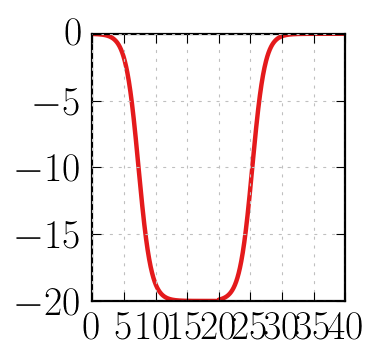

In [201]:
fig = plt.figure(figsize=(2, 2))
sim_time = np.linspace(0.0, 40.0, 1000)
plt.plot(sim_time, -richard(sim_time, 20, 1, 0.1, 2, 0, 20))
# plt.xlim(-10, 10)
# plt.ylim(-0.5,2.5)

In [14]:
def Phasor_Plot(Amps, Times, Interval, nat_freq, sens_curve=False):
    '''
    Amps     = numpy array
    Times    = numpy array
    Interval = length of time of impulse (currently all impulses are equal)
    nat_freq = natural frequency of system
    
    This function will plot the phasor plot of impulses according to the
    formula:
    r     = amplitude of impulse
    theta = natural freq * time of impulse
    
    It will then compute the resultant vector and plot it in red
    '''
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar', aspect = 'equal')
    ax.plot([], color='r', linewidth=3)
    ax.grid(True)
#     ax.set_rlabel_position(170)
    
    n = np.size(Amps)
    Rx = []
    Ry = []
    for i in range(n):
        Fi = Amps[i]
        Ti = Times[i]
        anglei = nat_freq * Ti
        
        if Fi <= 0:
            Fi = np.abs(Fi)
            anglei = np.pi + anglei
        Rxi = Fi * np.cos(anglei)
        Rx.append(Rxi)
        
        Ryi = Fi * np.sin(anglei)
        Ry.append(Ryi)
        arri = plt.arrow(anglei, 0, 0, 
                 Fi - 1, 
                 head_width=1/Fi, 
                 head_length=1,
                 edgecolor = 'black', 
                 facecolor = 'black', 
                 lw = 1, 
                 zorder = 5)
    R_x = sum(Rx)
    R_y = sum(Ry)

    A = np.sqrt(R_x**2 + R_y**2)
    angle = np.pi + np.arctan2(R_y,R_x)

    arr = plt.arrow(angle, 0, 0, 
             A - 1, 
             head_width=0.05, 
             head_length=1,
             edgecolor = 'red', 
             facecolor = 'red', 
             lw = 1, 
             zorder = 5,
             label = 'Test')
    ax.set_rmax(np.abs(A))
    ax.set_rgrids(np.abs(Amps))
    round_A = round(A,2)
    round_angle = round(np.degrees(angle),2)
    time_A = round(angle / nat_freq,3)
    plt.legend([arr,], ['({}, {}$^\circ$, {}s)'.format(round_A,
                                                      round_angle,
                                                      time_A)])
    if sens_curve == True:
        error_nat = np.linspace(nat_freq * 0.6, nat_freq * 1.4, 1000)
        R_error = []
        for i in range(n):
            Fi = Amps[i]
            Ti = Times[i]
            anglei = nat_freq * Ti
            if Fi <= 0:
                Fi = np.abs(Fi)
                anglei = np.pi + anglei
            error_angle_i = (anglei) - (((error_nat - nat_freq) /
                                                  error_nat) * anglei)
            Rx_error = []
            Ry_error = []
            for j in range(1000):
                Rx_errorj = Fi * np.cos(error_angle_i[j])
                Rx_error.append(Rx_errorj)

                Ry_errorj = Fi * np.sin(error_angle_i[j])
                Ry_error.append(Ry_errorj)

                Rx_error_sum = sum(np.abs(Rx_error))
                Ry_error_sum = sum(np.abs(Ry_error))

                R_errorj = np.sqrt(np.abs(Rx_error_sum)**2 +
                               np.abs(Ry_error_sum)**2)
                R_error.append(R_errorj)
        print(R_error)
#         plt.subplot(122)
#         plt.plot(error_nat, R_error)
    #     plt.savefig('test.pdf')
    plt.show() 

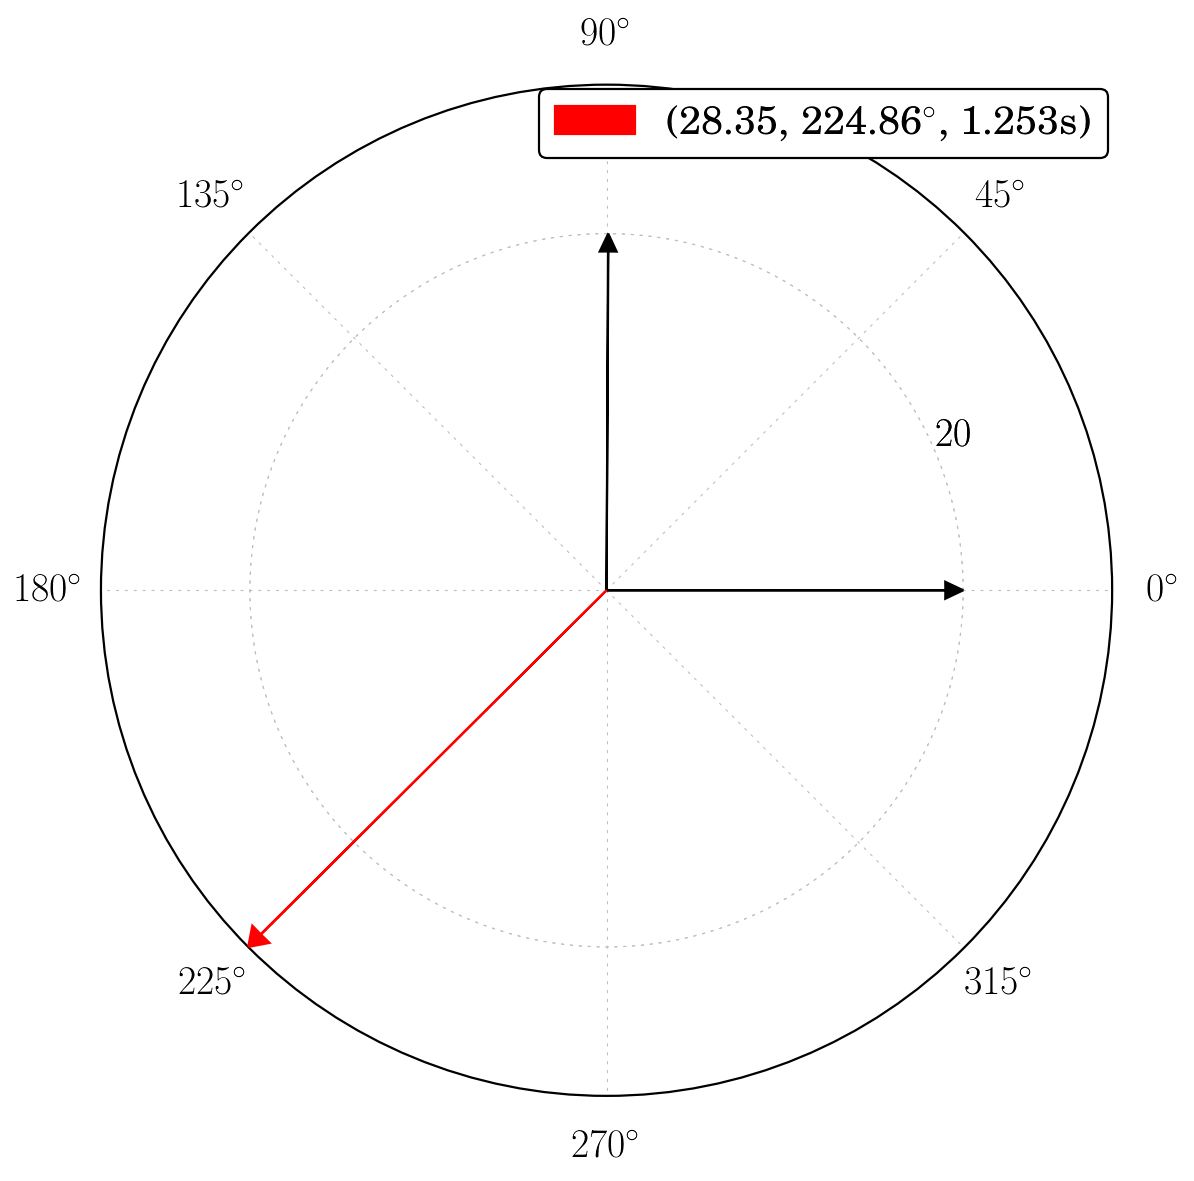

In [15]:
Phasor_Plot([20, 20],[0, 0.5],0.5,np.sqrt(9.81 / Pen_length))